# Using a Published Garden

In [13]:
!pip install garden-ai
!pip install opencv-python-headless

  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.9 MB)


In [2]:
from garden_ai import GardenClient
garden_client = GardenClient()

In [3]:
rts_garden = garden_client.get_garden('10.26311/5fb6-f950')
rts_garden

In [ ]:
image_url="https://github.com/cyber2a/Cyber2A-RTS-ToyModel/blob/main/data/images/valtest_yg_055.jpg?raw=true"

In [14]:
pred = rts_garden.identify_rts(image_url)

Output()

In [16]:
import requests
import tempfile
from torchvision.io import read_image

response = requests.get(image_url)
with tempfile.NamedTemporaryFile(delete=True, suffix='.jpg') as tmp_file:
    # Write the content to the temporary file
    tmp_file.write(response.content)
    tmp_file_path = tmp_file.name
    image = read_image(tmp_file_path)


In [17]:
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks
import cv2
def draw_predictions(image, pred):
    pred_labels = [f"RTS: {score:.3f}" for score in pred["scores"]]
    masks = (pred["masks"] > 0.7).squeeze(1)
    output_image = draw_segmentation_masks(image, masks, alpha=0.5, colors="red")
    pred_boxes = pred["boxes"].long()
    output_image = draw_bounding_boxes(
        output_image, pred_boxes, pred_labels, colors="black", width=0
    )
    return output_image
    
output_image = draw_predictions(image, pred)

i1=output_image.permute(1, 2, 0).numpy()
i2=cv2.cvtColor(i1, cv2.COLOR_RGB2BGR)

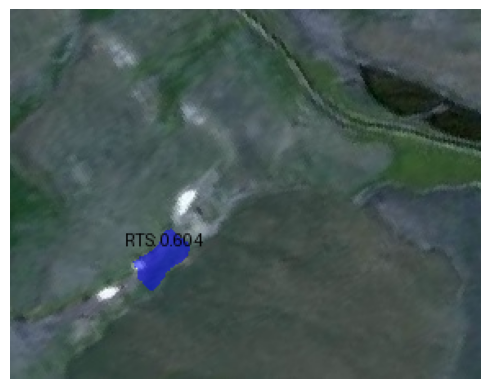

In [19]:
import matplotlib.pyplot as plt
plt.imshow(i2)
plt.axis('off')  # Optional: Hides the axis ticks and labels
plt.show()
